<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/Machine-Learning-6140/blob/master/Projects/SentimentAnalysisTextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Need to create access token and elevate permissions before doing the below code

In [12]:
consumer_key = 'dP6aBqDgx0HupvOu2wG52XWGD'
consumer_secret = 'UZ2Y3CieBjQxWDMEj2QB51fIqxWGgTmOWYC8EXe2PKzEdWIO6r'
access_token = '1567698816018546691-b5QnACdAMyxVzEAZmg4aRSiI9Pd4Qo'
access_token_secret = 'r01BCf5S5PFOH6rJnSYE9Fku2LSIK9WHonF4cLHwROt9k'

### Authenticating Twitter

In [17]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [20]:
hashtag = "#indiancricket"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets': tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'RT @Cricketracker: Suresh Raina, leaving a great legacy behind!\n\n#CricTracker #SureshRaina #Retirement #IndianCricket #CSK #IPL #Cricket ht…', 'Timestamp': datetime.datetime(2022, 9, 8, 2, 47, 3)}, {'Tweets': 'A match full of twists and turns. Pakistan did what only Pakistan can do.\n\nWith this Pakistan &amp;amp; Sri Lanka quali… https://t.co/q5kd3M16FZ', 'Timestamp': datetime.datetime(2022, 9, 8, 1, 30, 7)}, {'Tweets': 'RT @sanjay23938333: #IndianCricket  @BCCI @narendramodi @AmitShah @ImRo45 @imVkohli @BhuviOfficial @hardikpandya7 @JayShah Why now a days i…', 'Timestamp': datetime.datetime(2022, 9, 7, 23, 16, 1)}, {'Tweets': "When Naseem shah see Afghni players fight's with M Asif and then he do it\n\n#cricket #cricketer #indiancricketteam… https://t.co/88mGYR9QgG", 'Timestamp': datetime.datetime(2022, 9, 7, 22, 58, 44)}, {'Tweets': '#IndianCricket  @BCCI @narendramodi @AmitShah @ImRo45 @imVkohli @BhuviOfficial @hardikpandya7 @JayShah Why now a da… https://t.co/nSSrSZ

In [21]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,"RT @Cricketracker: Suresh Raina, leaving a gre...",2022-09-08 02:47:03
1,A match full of twists and turns. Pakistan did...,2022-09-08 01:30:07
2,RT @sanjay23938333: #IndianCricket @BCCI @nar...,2022-09-07 23:16:01
3,When Naseem shah see Afghni players fight's wi...,2022-09-07 22:58:44
4,#IndianCricket @BCCI @narendramodi @AmitShah ...,2022-09-07 22:58:16


In [22]:
india_ref = ['India', 'Indiacricket', 'IndianCricket', 'Indian', 'Cricket']

In [23]:
def identify_subject(tweet, refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag = 1
  return flag
df['India'] = df['Tweets'].apply(lambda x: identify_subject(x, india_ref))

### Preprocessing

In [24]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '@BCCI']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [29]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,India,Processed Tweet
0,"RT @Cricketracker: Suresh Raina, leaving a gre...",2022-09-08 02:47:03,1,"@Cricketracker: Suresh Raina, leaving great le..."
1,A match full of twists and turns. Pakistan did...,2022-09-08 01:30:07,0,A match full twist turns. Pakistan Pakistan do...
2,RT @sanjay23938333: #IndianCricket @BCCI @nar...,2022-09-07 23:16:01,1,@sanjay23938333: #IndianCricket @narendramodi ...
3,When Naseem shah see Afghni players fight's wi...,2022-09-07 22:58:44,0,When Naseem shah see Afghni player fight's M A...
4,#IndianCricket @BCCI @narendramodi @AmitShah ...,2022-09-07 22:58:16,1,#IndianCricket @narendramodi @AmitShah @ImRo45...


### Calculate Sentiment

In [33]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'India', 'polarity', 'subjectivity']].head(15)


,Processed Tweet,India,polarity,subjectivity
0,"@Cricketracker: Suresh Raina, leaving great le...",1,0.15,0.725
1,A match full twist turns. Pakistan Pakistan do...,0,0.35,0.550
2,@sanjay23938333: #IndianCricket @narendramodi ...,1,0.00,0.000
3,When Naseem shah see Afghni player fight's M A...,0,0.00,0.000
4,#IndianCricket @narendramodi @AmitShah @ImRo45...,1,0.00,0.000
5,Inna Lillahi wa inna ilayhi raji'un💔 Baray afs...,0,0.00,0.000
6,@aberrantabeer: Watch YouTube 😆 https://t.co/D...,0,0.00,0.000
7,@DEEPUVAJRAMUNI: ನಾಯಕನಾದವನಿಗೆ ತಂಡದ ಸದಸ್ಯರ ಸಲಹೆ...,0,0.00,0.000
8,"With back-to-back defeats, India face early ex...",1,0.10,0.300
9,#indiancricket https://t.co/o6nlwt7McR,0,0.00,0.000


In [34]:
India = df[df['India']==1][['Timestamp', 'polarity']]
India = India.sort_values(by='Timestamp', ascending=True)
India['MA Polarity'] = India.polarity.rolling(10, min_periods=3).mean()


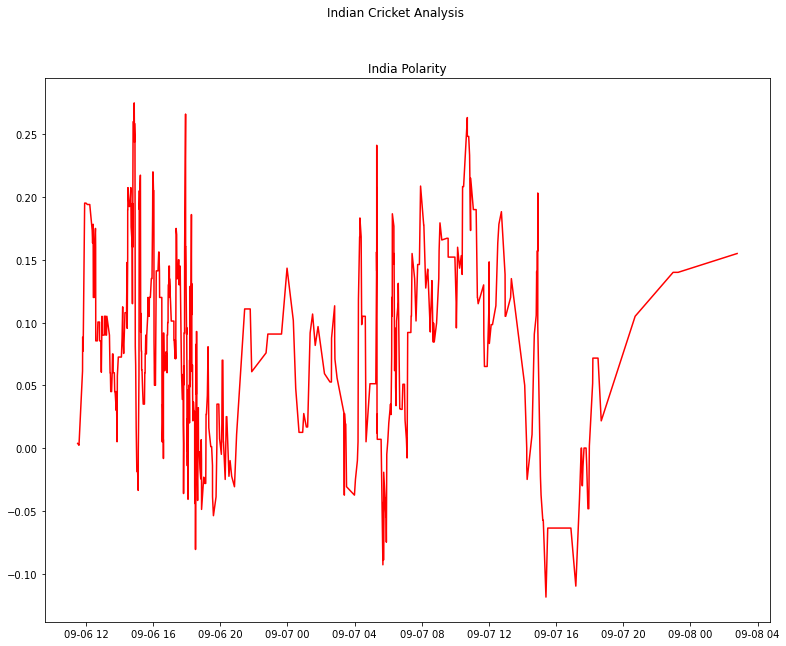

In [39]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(1, 1, figsize=(13, 10))

axes.plot(India['Timestamp'], India['MA Polarity'], color='red')
axes.set_title("\n".join(["India Polarity"]))

fig.suptitle("\n".join(["Indian Cricket Analysis"]), y=0.98)

plt.show()